In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno 


In [2]:
data = pd.read_excel('MISReports_VPS_ABC (version 1).xlsb.xlsx', sheet_name ='MISFacilityWiseReport')

In [3]:
data.head()

,CIF_ID,IMAC_ID,COUNTERPARTY_NAME,BUSINESS_SEGMENT,REGION,GROUPNAME,INDUSTRY_NAME,LEGAL_TYPE,FacilityID,MAIN_LIMIT_NAME,...,Unnamed: 13,SECURITY_DESCRIPTION,FMV,ABC_SHARE_PER,ABC_SHARE,Held,TENOR,PRICING,PRIORITY_SECTOR,SENSITIVE_SECTOR
0,0,21087,21087-xxxxx,CB - MidCorp,NaN,NaN,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),FAC-4699,Short Term Loan Unsecured,...,NaN,P&M DESC,0,1.0,0.0,No,9.0,NaN,Non Priority-Sector,NaN
1,0,21087,21087-xxxxx,CB - MidCorp,NaN,NaN,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),FAC-4699,Short Term Loan Unsecured,...,NaN,P&M DESC,0,1.0,0.0,No,9.0,NaN,Non Priority-Sector,NaN
2,0,21087,21087-xxxxx,CB - MidCorp,NaN,NaN,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),FAC-4699,Short Term Loan Unsecured,...,NaN,All CAs DESC,0,1.0,0.0,No,9.0,NaN,Non Priority-Sector,NaN
3,0,21176,21176-xxxxx,CB - MidCorp,NaN,NaN,(IND076) OTHER INDUSTRIES,Private Ltd. Companies,FAC-3018,Working Capital Demand Loan Secured,...,NaN,Land (non Agri) DESC,0,1.0,0.0,No,17.0,NaN,Non Priority-Sector,NaN
4,0,21176,21176-xxxxx,CB - MidCorp,NaN,NaN,(IND076) OTHER INDUSTRIES,Private Ltd. Companies,FAC-3018,Working Capital Demand Loan Secured,...,NaN,All CAs DESC,0,1.0,0.0,No,17.0,NaN,Non Priority-Sector,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CIF_ID                7850 non-null   object 
 1   IMAC_ID               7852 non-null   int64  
 2   COUNTERPARTY_NAME     7852 non-null   object 
 3   BUSINESS_SEGMENT      7831 non-null   object 
 4   REGION                6037 non-null   object 
 5   GROUPNAME             3591 non-null   object 
 6   INDUSTRY_NAME         7851 non-null   object 
 7   LEGAL_TYPE            7852 non-null   object 
 8   FacilityID            7852 non-null   object 
 9   MAIN_LIMIT_NAME       7852 non-null   object 
 10  CCY                   7852 non-null   object 
 11  AMOUNT                7852 non-null   float64
 12  FACILITY_RATING       6020 non-null   object 
 13  Unnamed: 13           0 non-null      float64
 14  SECURITY_DESCRIPTION  6073 non-null   object 
 15  FMV                  

<AxesSubplot:>

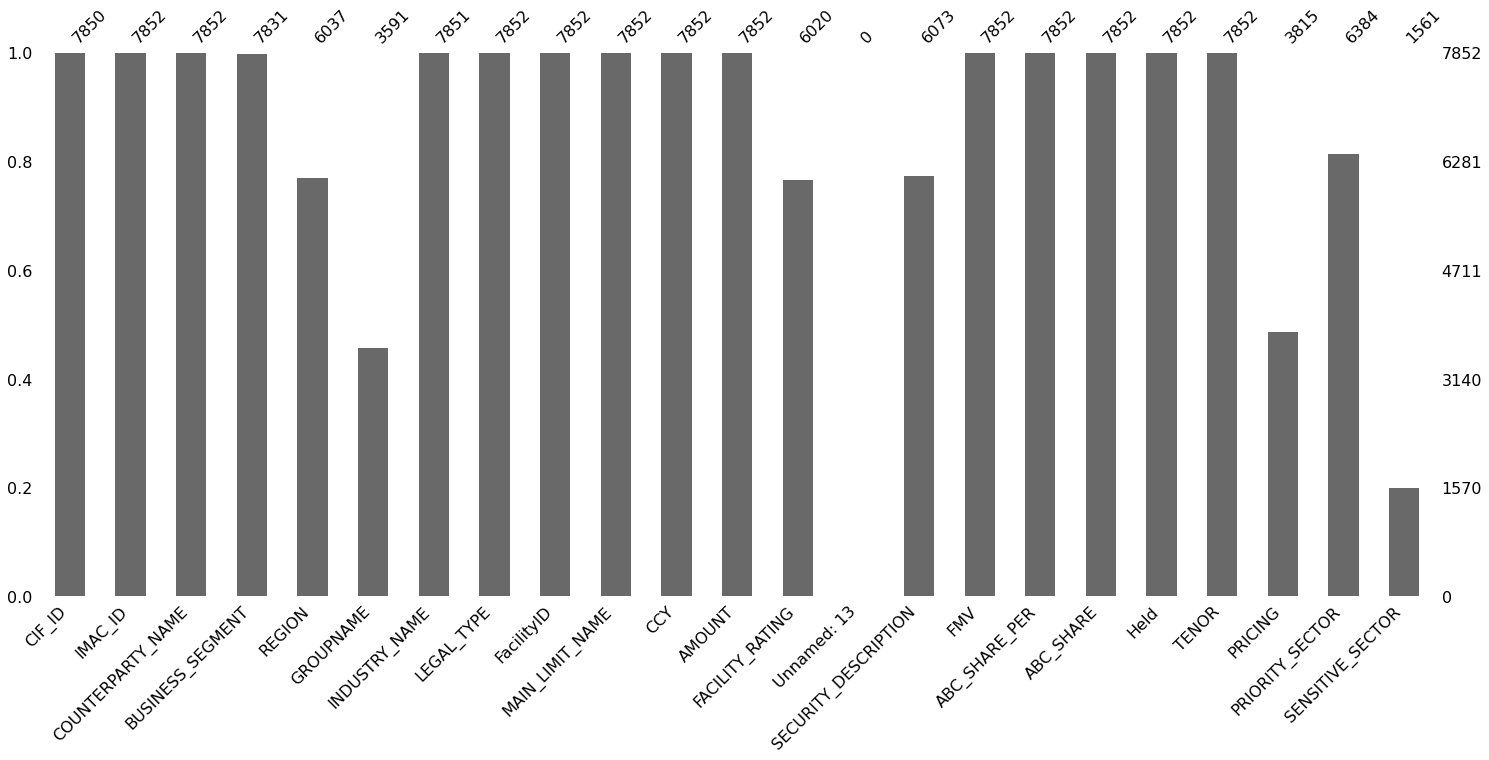

In [5]:
import missingno 
missingno.bar(data)


In [6]:
data.isna().sum()

CIF_ID                     2
IMAC_ID                    0
COUNTERPARTY_NAME          0
BUSINESS_SEGMENT          21
REGION                  1815
GROUPNAME               4261
INDUSTRY_NAME              1
LEGAL_TYPE                 0
FacilityID                 0
MAIN_LIMIT_NAME            0
CCY                        0
AMOUNT                     0
FACILITY_RATING         1832
Unnamed: 13             7852
SECURITY_DESCRIPTION    1779
FMV                        0
ABC_SHARE_PER              0
ABC_SHARE                  0
Held                       0
TENOR                      0
PRICING                 4037
PRIORITY_SECTOR         1468
SENSITIVE_SECTOR        6291
dtype: int64

In [7]:
null_more_than20=data.isna().sum()/len(data)*100>20

In [8]:
null_more_than20

CIF_ID                  False
IMAC_ID                 False
COUNTERPARTY_NAME       False
BUSINESS_SEGMENT        False
REGION                   True
GROUPNAME                True
INDUSTRY_NAME           False
LEGAL_TYPE              False
FacilityID              False
MAIN_LIMIT_NAME         False
CCY                     False
AMOUNT                  False
FACILITY_RATING          True
Unnamed: 13              True
SECURITY_DESCRIPTION     True
FMV                     False
ABC_SHARE_PER           False
ABC_SHARE               False
Held                    False
TENOR                   False
PRICING                  True
PRIORITY_SECTOR         False
SENSITIVE_SECTOR         True
dtype: bool

In [9]:
dropping_features=null_more_than20[null_more_than20==1].index

In [10]:
dropping_features

Index(['REGION', 'GROUPNAME', 'FACILITY_RATING', 'Unnamed: 13',
       'SECURITY_DESCRIPTION', 'PRICING', 'SENSITIVE_SECTOR'],
      dtype='object')

In [11]:
newdf=data.drop(dropping_features,axis=1)

In [12]:
newdf

,CIF_ID,IMAC_ID,COUNTERPARTY_NAME,BUSINESS_SEGMENT,INDUSTRY_NAME,LEGAL_TYPE,FacilityID,MAIN_LIMIT_NAME,CCY,AMOUNT,FMV,ABC_SHARE_PER,ABC_SHARE,Held,TENOR,PRIORITY_SECTOR
0,0,21087,21087-xxxxx,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),FAC-4699,Short Term Loan Unsecured,INR,36.18,0,1.0,0.0,No,9.0,Non Priority-Sector
1,0,21087,21087-xxxxx,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),FAC-4699,Short Term Loan Unsecured,INR,36.18,0,1.0,0.0,No,9.0,Non Priority-Sector
2,0,21087,21087-xxxxx,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),FAC-4699,Short Term Loan Unsecured,INR,36.18,0,1.0,0.0,No,9.0,Non Priority-Sector
3,0,21176,21176-xxxxx,CB - MidCorp,(IND076) OTHER INDUSTRIES,Private Ltd. Companies,FAC-3018,Working Capital Demand Loan Secured,INR,20.00,0,1.0,0.0,No,17.0,Non Priority-Sector
4,0,21176,21176-xxxxx,CB - MidCorp,(IND076) OTHER INDUSTRIES,Private Ltd. Companies,FAC-3018,Working Capital Demand Loan Secured,INR,20.00,0,1.0,0.0,No,17.0,Non Priority-Sector
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,0,116049,TT,C&IB,(IND099) AUTO DEALER,BIS,FAC-15653,Gold metal loan,INR,0.20,0,0.0,0.0,No,24.0,NaN
7848,0,116049,TT,C&IB,(IND099) AUTO DEALER,BIS,FAC-15671,Dealer Anchor Line,INR,0.20,0,0.0,0.0,No,24.0,NaN
7849,0,116049,TT,C&IB,(IND099) AUTO DEALER,BIS,FAC-15729,LOC,INR,1.00,0,0.0,0.0,No,10.0,NaN
7850,0,116149,MUSHRAF ENTERPRISES,C&IB,(IND125) WATER SUPPLY PIPE-LINE,BIS,FAC-15495,Cash Credit Secured,INR,0.10,500,0.0,0.0,No,120.0,NaN


In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CIF_ID             7850 non-null   object 
 1   IMAC_ID            7852 non-null   int64  
 2   COUNTERPARTY_NAME  7852 non-null   object 
 3   BUSINESS_SEGMENT   7831 non-null   object 
 4   INDUSTRY_NAME      7851 non-null   object 
 5   LEGAL_TYPE         7852 non-null   object 
 6   FacilityID         7852 non-null   object 
 7   MAIN_LIMIT_NAME    7852 non-null   object 
 8   CCY                7852 non-null   object 
 9   AMOUNT             7852 non-null   float64
 10  FMV                7852 non-null   int64  
 11  ABC_SHARE_PER      7852 non-null   float64
 12  ABC_SHARE          7852 non-null   float64
 13  Held               7852 non-null   object 
 14  TENOR              7852 non-null   float64
 15  PRIORITY_SECTOR    6384 non-null   object 
dtypes: float64(4), int64(2),

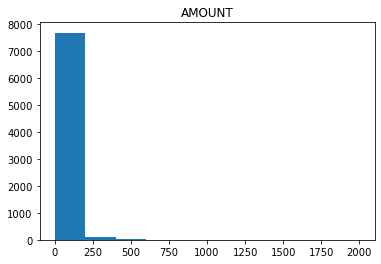

In [14]:
plt.hist(newdf['AMOUNT'], bins=10)
plt.title("AMOUNT")
plt.show()

In [15]:
newdf['BUSINESS_SEGMENT'].mode()[0]

'CB - MidCorp'

In [16]:
newdf['BUSINESS_SEGMENT']=newdf['BUSINESS_SEGMENT'].replace(np.nan , newdf['BUSINESS_SEGMENT'].mode()[0])

In [17]:
newdf['BUSINESS_SEGMENT'].isna().sum().sum()

0

In [18]:
newdf['INDUSTRY_NAME']=newdf['INDUSTRY_NAME'].replace(np.nan , newdf['INDUSTRY_NAME'].mode()[0])

In [19]:
newdf['INDUSTRY_NAME'].isna().sum().sum()

0

In [20]:
newdf['PRIORITY_SECTOR'].mode()[0]

'Non Priority-Sector'

In [21]:
newdf['PRIORITY_SECTOR']=newdf['PRIORITY_SECTOR'].replace(np.nan , newdf['PRIORITY_SECTOR'].mode()[0])

In [22]:
newdf['PRIORITY_SECTOR'].isna().sum().sum()

0

In [23]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CIF_ID             7850 non-null   object 
 1   IMAC_ID            7852 non-null   int64  
 2   COUNTERPARTY_NAME  7852 non-null   object 
 3   BUSINESS_SEGMENT   7852 non-null   object 
 4   INDUSTRY_NAME      7852 non-null   object 
 5   LEGAL_TYPE         7852 non-null   object 
 6   FacilityID         7852 non-null   object 
 7   MAIN_LIMIT_NAME    7852 non-null   object 
 8   CCY                7852 non-null   object 
 9   AMOUNT             7852 non-null   float64
 10  FMV                7852 non-null   int64  
 11  ABC_SHARE_PER      7852 non-null   float64
 12  ABC_SHARE          7852 non-null   float64
 13  Held               7852 non-null   object 
 14  TENOR              7852 non-null   float64
 15  PRIORITY_SECTOR    7852 non-null   object 
dtypes: float64(4), int64(2),

In [24]:
newdf.isna().sum()

CIF_ID               2
IMAC_ID              0
COUNTERPARTY_NAME    0
BUSINESS_SEGMENT     0
INDUSTRY_NAME        0
LEGAL_TYPE           0
FacilityID           0
MAIN_LIMIT_NAME      0
CCY                  0
AMOUNT               0
FMV                  0
ABC_SHARE_PER        0
ABC_SHARE            0
Held                 0
TENOR                0
PRIORITY_SECTOR      0
dtype: int64

In [25]:
newdf.drop(['CIF_ID','IMAC_ID'],axis=1,inplace=True)

In [26]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COUNTERPARTY_NAME  7852 non-null   object 
 1   BUSINESS_SEGMENT   7852 non-null   object 
 2   INDUSTRY_NAME      7852 non-null   object 
 3   LEGAL_TYPE         7852 non-null   object 
 4   FacilityID         7852 non-null   object 
 5   MAIN_LIMIT_NAME    7852 non-null   object 
 6   CCY                7852 non-null   object 
 7   AMOUNT             7852 non-null   float64
 8   FMV                7852 non-null   int64  
 9   ABC_SHARE_PER      7852 non-null   float64
 10  ABC_SHARE          7852 non-null   float64
 11  Held               7852 non-null   object 
 12  TENOR              7852 non-null   float64
 13  PRIORITY_SECTOR    7852 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 858.9+ KB


In [27]:
newdf.drop(['FacilityID','COUNTERPARTY_NAME'],axis=1,inplace=True)

In [28]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BUSINESS_SEGMENT  7852 non-null   object 
 1   INDUSTRY_NAME     7852 non-null   object 
 2   LEGAL_TYPE        7852 non-null   object 
 3   MAIN_LIMIT_NAME   7852 non-null   object 
 4   CCY               7852 non-null   object 
 5   AMOUNT            7852 non-null   float64
 6   FMV               7852 non-null   int64  
 7   ABC_SHARE_PER     7852 non-null   float64
 8   ABC_SHARE         7852 non-null   float64
 9   Held              7852 non-null   object 
 10  TENOR             7852 non-null   float64
 11  PRIORITY_SECTOR   7852 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 736.2+ KB


In [29]:
x=newdf.drop('AMOUNT',axis=1)

In [30]:
y=newdf['AMOUNT']

In [31]:
x.head(2)

,BUSINESS_SEGMENT,INDUSTRY_NAME,LEGAL_TYPE,MAIN_LIMIT_NAME,CCY,FMV,ABC_SHARE_PER,ABC_SHARE,Held,TENOR,PRIORITY_SECTOR
0,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),Short Term Loan Unsecured,INR,0,1.0,0.0,No,9.0,Non Priority-Sector
1,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),Short Term Loan Unsecured,INR,0,1.0,0.0,No,9.0,Non Priority-Sector


In [32]:
x_num=x.select_dtypes(include=['float','int'])

In [33]:
x_cat=x.select_dtypes(exclude=['float','int'])

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [35]:
x_cat.head(2)

,BUSINESS_SEGMENT,INDUSTRY_NAME,LEGAL_TYPE,MAIN_LIMIT_NAME,CCY,Held,PRIORITY_SECTOR
0,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),Short Term Loan Unsecured,INR,No,Non Priority-Sector
1,CB - MidCorp,(IND076) OTHER INDUSTRIES,Public Ltd. Companies (Listed),Short Term Loan Unsecured,INR,No,Non Priority-Sector


In [36]:
for i in x_cat.columns:
    x_cat[i]=label_encoder.fit_transform(x_cat[i])
    

C:\Users\chira\AppData\Local\Temp/ipykernel_18356/1148266843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat[i]=label_encoder.fit_transform(x_cat[i])


In [37]:
x_cat.head(2)

,BUSINESS_SEGMENT,INDUSTRY_NAME,LEGAL_TYPE,MAIN_LIMIT_NAME,CCY,Held,PRIORITY_SECTOR
0,3,62,14,55,0,0,0
1,3,62,14,55,0,0,0


In [38]:
x_num.head(2)

,FMV,ABC_SHARE_PER,ABC_SHARE,TENOR
0,0,1.0,0.0,9.0
1,0,1.0,0.0,9.0


In [39]:
def decoding(colmns):
    c_list=list(newdf[colmns])
    c_value=label_encoder.fit_transform(c_list)
    c_keys=label_encoder.inverse_transform(c_value)
    mergeLists_c = dict(zip( c_value,c_keys))
    print(mergeLists_c)


In [40]:
decoding('BUSINESS_SEGMENT')

{3: 'CB - MidCorp', 2: 'C&IB', 6: 'MFIs', 4: 'CB SME', 7: 'MNC', 9: 'NEB', 5: 'FIGU', 1: 'AGRI WHOLESALE', 0: 'AGRI RETAIL', 10: 'RETAIL BR BKG', 11: 'SUPPLY CHAIN', 8: 'MSME'}


In [41]:
decoding('INDUSTRY_NAME')

{62: '(IND076) OTHER INDUSTRIES', 80: '(IND095) MEDIA/ ENTERTAINMENT/ ADVERTISING', 61: '(IND075) DIVERSIFIED', 41: '(IND046) CONSTRUCTION- OTHERS', 37: '(IND042) GEMS/ JEWELLERY - MFG.', 3: '(IND004) EDIBLE OILS & VANASPATI', 27: '(IND032) CEMENT', 132: '(IND174) SMALL FINANCE BANKS', 25: '(IND029) RUBBER/ PLASTIC & PRODUCTS', 28: '(IND033) IRON & STEEL', 24: '(IND028) CHEMICALS', 71: '(IND086) PROFESSIONAL SERVICES- AUDIT/ LEGAL/ CONSULTING/OTHERS', 18: '(IND022) PAPER & PRODUCTS', 15: '(IND019) OTHER TEXTILES', 20: '(IND024) PETROLEUM (EXCL. OIL STORAGE/ PIPELINE/ LNG)', 33: '(IND038) ENGINEERING-SPECIALIZED/ OTHERS', 58: '(IND072) INFRASTRUCTURE- OTHERS', 68: '(IND083) NBFC- Others', 83: '(IND098) LARGE FORMAT RETAIL', 36: '(IND041) AUTOMOBILE - OTHERS', 44: '(IND049) ROAD/ TUNNEL/ BRIDGES (BOT, BOOT)', 22: '(IND026) PHARMACEUTICAL', 39: '(IND044) CONTRACTORS- ROADS/ IRRIGATION/ MUNICIPALITIES', 69: '(IND084) FINANCIAL SERVICES', 63: '(IND077) NBFC-MFI', 78: '(IND093) LOGISTICS/ WA

In [42]:
x_num_cat=pd.concat([x_num,x_cat],axis=1)

In [43]:
x_num_cat

,FMV,ABC_SHARE_PER,ABC_SHARE,TENOR,BUSINESS_SEGMENT,INDUSTRY_NAME,LEGAL_TYPE,MAIN_LIMIT_NAME,CCY,Held,PRIORITY_SECTOR
0,0,1.0,0.0,9.0,3,62,14,55,0,0,0
1,0,1.0,0.0,9.0,3,62,14,55,0,0,0
2,0,1.0,0.0,9.0,3,62,14,55,0,0,0
3,0,1.0,0.0,17.0,3,62,12,65,0,0,0
4,0,1.0,0.0,17.0,3,62,12,65,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7847,0,0.0,0.0,24.0,2,84,0,23,0,0,0
7848,0,0.0,0.0,24.0,2,84,0,15,0,0,0
7849,0,0.0,0.0,10.0,2,84,0,32,0,0,0
7850,500,0.0,0.0,120.0,2,104,0,12,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_num_cat, y, test_size = 0.3, random_state = 0)


In [45]:
X_train.shape,y_train.shape

((5496, 11), (5496,))

In [46]:
X_test.shape , y_test.shape

((2356, 11), (2356,))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
y_test.values

array([ 0., 30.,  4., ..., 48.,  5.,  0.])

In [52]:
y_pred

array([ 6.67213703, 25.52180453, 28.54161577, ..., 42.69459318,
       19.38779676, 23.52171351])

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 27.698871015894753


In [55]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 6212.207319260648


In [56]:
mse=mean_squared_error(y_test,y_pred)
mse

6212.207319260648

In [57]:
print("RMSE",np.sqrt(mse))

RMSE 78.8175571764353


 it depends on the dependent variable. The unit of RMSE is same as dependent variable. 
 If your data has a range of 0 to 100000 then RMSE value of 3000 is small, 
 but if the range goes from 0 to 1, it is pretty huge. 
 Try to play with other input variables, and compare your RMSE values. The smaller the RMSE value, the better the model.

Also, try to compare your RMSE values of both training and testing data. If they are almost similar, your model is good. If the RMSE for the testing data is much higher than that of the training data, it is likely that you've badly over fit the data.